## <font color=green>SEASONAL FLU VACCINE UPTAKE PREDICTION</font> 

![FLU](img.jpg)


## <font color=green><i>Problem statement</i></font> 



The occurrence of the flu season repeats annually, and each year people make a choice to either receive the flu shot or not.

This attempts to develop a predictive model to forecast individuals' decision to receive the flu shot or not during the annual flu season.

The model should leverage historical data to identify patterns and factors that influence people's vaccination choices.

This predictive model aims to assist in public health planning and decision-making by providing insights into vaccination trends and helping allocate resources effectively to the United States government health Agencies.

***


## <font color=green><i>Objective</i></font> 

- Create a model that can predict seasonal flu vaccine uptake based on a person's background and patterns of behavior

- Minimize False Positives and False Negatives to Enhance Model Reliability:

- Evaluate and compare various models to determine which one achieves the highest accuracy in predicting vaccination status.

***


## <font color=green><i> Data understanding</i></font> 

###  <span style = 'color :cyan'> Data Description </span>
The datasets used for this project were downloaded from [Kaggle]("https://www.kaggle.com/datasets/arashnic/flu-data). It contains information on the social,economic and demographic backgrounds of the respondents as well as their opinions on the H1N1 and seasonal flu vaccines. The training data has 26707 rows and 36 columns. The information contained with the columns is as follows as described by the data [dictionary]("https://www.kaggle.com/datasets/arashnic/flu-data):

##
##
|No.| Column    | Description|
|---| ---       | ---         |
|1| `respondent_id` | Unique and random identifier for the respondents|
|2|`h1n1_concern`| Level of concern about H1N1 flu with 0 being not concerned at all and 3 being very concerned|
|3|`h1n1_knowledge`| Level of knowledge about H1N1 with 0 being no knowledge and 2 being a lot of knowledge|
|4|`behavioral_antiviral_meds`| Has taken any antiviral medication (0-no,1-yes)|
|5|`behavioral_avoidance`| Has avoided close contact with anyone with flu-like symptoms (0-no,1-yes)|
|6|`behavioral_face_mask`| Has bought a face mask (0-no,1-yes)|
|7|`behavioral_wash_hands`| Has frequently washed hands or used hand sanitizer (0-no,1-yes)|
|8|`behavioral_large_gatherings`| Has reduced time at large gatherings (0-no,1-yes)|
|9|`behavioral_outside_home`| Has reduced contact with people outside of own household (0-no,1-yes)|
|10|`behavioral_touch_face`| Has avoided touching eyes, nose or mouth (0-no,1-yes)|
|11|`doctor_recc_h1n1`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|12|`doctor_recc_seasonal`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|13|`chronic_med_condition`| Has any of the following chronic conditions: asthma or any lung condition, a heart condition, a kidney condition, sickle cell anaemia or any other anaemia, a neurological or neouromuscular condition, a liver condition, or a weakened immune system as a result of a chronic illness or medicines taken for a chronic illness (0-no,1-yes)|
|14|`child_under_6_months`| Has regular close contact with a child under the age of six months (0-no,1-yes)|
|15|`health_worker`| Is a healthcare worker (0-no,1-yes)|
|16|`health_insurance`| Has health insurance (0-no,1-yes)|
|17|`opinion_h1n1_vacc_effective`| Respondent's opinion on the efficacy of the vaccine with 1 being not at all effective and 5 being very effective|
|18|`opinion_h1n1_risk`| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine with 1 being very low and 5 being very high|
|19|`opinion_h1n1_sick_from_vacc`| Respondent's worry of getting sick from H1N1 vaccine with 1 being not worried at all and 5 being very worried|
|20|`opinion_seas_vacc_effective`| Respondent's opinion about seasonal flu vaccine effectiveness with 1 being not effective at all and 5 being very effective|
|21|`opinion_seas_risk`| Respondent's opinion about risk of getti
|26|`sex`| Sex of respondent|
|27|`income_poverty`| Household annual income of respondent with respect to 2008 Census poverty thresholds|
|28|`marital status`| Marital status of respondent|
|29|`rent_or_own`| Housing situation of respondent|
|30|`employment_status`| Employment status of respondent|
|31|`hhs_geo_region`| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings|
|32|`census_msa`| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census|
|33|`household_adults`| Number of *other* adults in the household, top-coded to 3|
|34|`household_children`| Number of children in the household, top-coded to 3|
|35|`employment_industry`| Type of industry respondent is employed in. Values are represented as short random character strings|
|36|`employment_occupation`| Type of occupation of respondent.Values are represented as short random character strings| 



### <span style = 'color :cyan'> Data loading </span>

This project provides 3 datasets as follows:-
- test_set_feature 
- Training_set_features
- training_set_labels 

***


## Loading the training_set feature an the trainin_set_labels

In [17]:
#importing necessariy libraries to facilitate with data  loading
import pandas as pd
import numpy as np

In [18]:
#loading the training_set_features to have an overview and look of the dataset
training_set_features = pd.read_csv(r'data_set\training_set_features.csv')
training_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [19]:
#loading the training_set_labels.
training_set_labels = pd.read_csv(r'data_set\training_set_labels.csv')
training_set_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


### Merging the train_set_features and the train_set_labels.


Merging  the raining_set_features and the training_set_labels to ensures that the data is correctly aligned simplifying subsequent analysis and modeling processes.

In [20]:
#merging the traing_set_features and the traing_set_labesl

train_f_train_l =pd.merge(training_set_features,training_set_labels, on="respondent_id", how="inner")
train_f_train_l.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [21]:
#Inspecting the datatype after merging
train_f_train_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

The above output shows tht the merged files contains:-
- 23 floats64
- 3 Int64
- 12 Objects

###  <span style = 'color :cyan'> Data Exploration </span>

In [22]:
#loading the categorical colums
categorical_columns = train_f_train_l.select_dtypes(include=['object'])
categorical_columns.head(10)


,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
5,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",saaquncn,vlluhbov
6,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",xicduogh,xtkaffoo
7,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,pxcmvdjn,xqwwgdyp
8,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",xicduogh,ccgxvspp
9,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",NaN,NaN


Apon investigation of the categorical columns, following were deem unusable hence need to drop them.
- employment_industry
- employment_occupation
- hhs_geo_region

In [23]:
##Numerical columns
numerical_columns = train_f_train_l.select_dtypes(include=['float64'])
numerical_columns.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,2.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,1.0,0.0
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0


#### Dropping unneccesary categorical columns and ny other column associated with the HINI vaccine since our focus is on the seasonal flu vaccine

In [24]:
#dropping colmuns directly assocaited with the H1N1 vaccine under the train set
train_f_train_l.drop(columns={'respondent_id','hhs_geo_region','employment_occupation','employment_industry','h1n1_vaccine', 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'}, inplace=True)

In [25]:
#inspectig the data to ensure neccessary col have been dropped
train_f_train_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             14433 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

### Handing missing values

Investigating missing values in the merged dataset

In [26]:
#checking the percentage of null values on the categoricla colums
missing_values_percentage = (train_f_train_l.isnull().sum() / len(train_f_train_l)) * 100
missing_values_percentage_sorted =missing_values_percentage .sort_values(ascending=False)
# missing_values_percentage_sorted
missing_values_percentage_sorted

health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_hands           0.157262
behavioral_face_mask            0.071142
age_group                       0.000000
race                            0.000000
sex             

Heath Insurance followed by poverty_income exhibits the most null values

In [27]:
#dropping the health insurance and the poverty_income level
train_f_train_l.drop(columns={'health_insurance','income_poverty'}, inplace=True)

#### Filling the missing values

In [28]:
#filling in the missing values.

train_df = train_f_train_l

# Fill 'object' type columns with the word 'unknown'
train_df.fillna({col: 'unknown' for col in train_df.select_dtypes(include='object').columns}, inplace=True)

# Fill 'int' and 'float' type columns with the mean of the column
train_df.fillna(train_df.select_dtypes(include=['int64','float64']).mean(), inplace=True)


In [29]:
##Invenstigating the dataset after filling in the missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26707 non-null  float64
 1   behavioral_avoidance         26707 non-null  float64
 2   behavioral_face_mask         26707 non-null  float64
 3   behavioral_wash_hands        26707 non-null  float64
 4   behavioral_large_gatherings  26707 non-null  float64
 5   behavioral_outside_home      26707 non-null  float64
 6   behavioral_touch_face        26707 non-null  float64
 7   doctor_recc_seasonal         26707 non-null  float64
 8   chronic_med_condition        26707 non-null  float64
 9   child_under_6_months         26707 non-null  float64
 10  health_worker                26707 non-null  float64
 11  opinion_seas_vacc_effective  26707 non-null  float64
 12  opinion_seas_risk            26707 non-null  float64
 13  opinion_seas_sic

Apon deleting of unneccesary collumns the dataset now has
- 17 floats64
- 1 Int64
- 9 Objects

Confirming that the dataset now has no missing values

In [30]:
# confirming that there are no missing values in our categorical columns.
if train_df.isnull().values.any():
    print("Contains null values")
else:
    print("No null values")

No null values


In [31]:
train_df.isnull().sum()/len(train_df)*100

behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
opinion_seas_vacc_effective    0.0
opinion_seas_risk              0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
marital_status                 0.0
rent_or_own                    0.0
employment_status              0.0
census_msa                     0.0
household_adults               0.0
household_children             0.0
seasonal_vaccine               0.0
dtype: float64

### Performing Ordinal encoding on my categorical dataset of the train_df


In [32]:
#importing necessary library.

from sklearn.preprocessing import OrdinalEncoder

# Select columns of object type
object_columns = train_df.select_dtypes(include='object').columns

# Initializing OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Applyng  Ordinal Encoding to the object columns
train_df[object_columns] = ordinal_encoder.fit_transform(train_df[object_columns])

# View the updated DataFrame
train_df.head()


,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,...,1.0,3.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.0,...,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.329735,1.0,0.0,...,2.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.000000,1.0,0.0,...,0.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


The encoding transforms categorical values into numerical values while preserving their order, improving model interpretability, performance, and reducing dimensionality, making it an essential step in the preprocessing pipeline when dealing with ordered categories.

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26707 non-null  float64
 1   behavioral_avoidance         26707 non-null  float64
 2   behavioral_face_mask         26707 non-null  float64
 3   behavioral_wash_hands        26707 non-null  float64
 4   behavioral_large_gatherings  26707 non-null  float64
 5   behavioral_outside_home      26707 non-null  float64
 6   behavioral_touch_face        26707 non-null  float64
 7   doctor_recc_seasonal         26707 non-null  float64
 8   chronic_med_condition        26707 non-null  float64
 9   child_under_6_months         26707 non-null  float64
 10  health_worker                26707 non-null  float64
 11  opinion_seas_vacc_effective  26707 non-null  float64
 12  opinion_seas_risk            26707 non-null  float64
 13  opinion_seas_sic

The above output sows that all the categorical columns have been transformed to numerical indicating a successful encoding process
***



## <font color=green><i>Feature Scaling on the train_df</i></font> 

In [1426]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select only numerical columns for scaling
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform the numerical columns with MinMaxScaler
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Display the first few rows to verify the scaling
train_df.head()


,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,...,0.25,1.0,0.0,0.5,0.0,0.333333,1.0,0.000000,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.0,...,0.00,1.0,1.0,0.5,0.5,0.000000,0.0,0.000000,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.329735,1.0,0.0,...,0.50,1.0,1.0,0.5,0.0,0.000000,0.0,0.666667,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.000000,1.0,0.0,...,0.00,1.0,0.0,0.5,0.5,0.333333,0.5,0.000000,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,...,0.75,1.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.0


By scaling features to the same range, the model treats all features equally, preventing some features from dominating the learning process just because of their larger scale.


***

## 2.Loading the test_set_features dataset

In [1427]:
#loading the test_set_features.
test_set_features = pd.read_csv(r'data_set\test_set_features.csv')
test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [1428]:
#checking for the structure of the dataset
test_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [1429]:
#dropping colmuns directly assocaited with the H1N1 vaccine under the train set
test_set_features.drop(columns={'respondent_id','hhs_geo_region','employment_occupation','employment_industry','h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'}, inplace=True)

In [1430]:
#checking datastructure after dropping collumns
test_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26629 non-null  float64
 1   behavioral_avoidance         26495 non-null  float64
 2   behavioral_face_mask         26689 non-null  float64
 3   behavioral_wash_hands        26668 non-null  float64
 4   behavioral_large_gatherings  26636 non-null  float64
 5   behavioral_outside_home      26626 non-null  float64
 6   behavioral_touch_face        26580 non-null  float64
 7   doctor_recc_seasonal         24548 non-null  float64
 8   chronic_med_condition        25776 non-null  float64
 9   child_under_6_months         25895 non-null  float64
 10  health_worker                25919 non-null  float64
 11  health_insurance             14480 non-null  float64
 12  opinion_seas_vacc_effective  26256 non-null  float64
 13  opinion_seas_ris

Handling missing values of the test_set_feature

In [1431]:
#checking the percentage of null values on the categoricla colums
missing_values_test_df = (test_set_features.isnull().sum() / len(train_f_train_l)) * 100
missing_values_test_df_sorted = missing_values_test_df.sort_values(ascending=False)
# missing_values_percentage_sorted
missing_values_test_df_sorted

health_insurance               45.785749
income_poverty                 16.838282
doctor_recc_seasonal            8.087767
rent_or_own                     7.623470
employment_status               5.507919
marital_status                  5.399334
education                       5.268282
chronic_med_condition           3.489722
child_under_6_months            3.044146
health_worker                   2.954282
opinion_seas_sick_from_vacc     1.950799
opinion_seas_risk               1.868424
opinion_seas_vacc_effective     1.692440
household_children              0.842476
household_adults                0.842476
behavioral_avoidance            0.797544
behavioral_touch_face           0.479275
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.295803
behavioral_large_gatherings     0.269592
behavioral_wash_hands           0.149773
behavioral_face_mask            0.071142
age_group                       0.000000
race                            0.000000
sex             

In [1432]:
#dropping the health insurance and the poverty_income level
test_set_features.drop(columns={'health_insurance','income_poverty'}, inplace=True)

### Filling in the missing values on the test_set_feature

In [ ]:
#filling in the missing values.

test_df = test_set_features

# Fill 'object' type columns with the word 'unknown'
test_df.fillna({col: 'unknown' for col in test_df.select_dtypes(include='object').columns}, inplace=True)

# Fill 'int' and 'float' type columns with the mean of the column
test_df.fillna(test_df.select_dtypes(include=['int64', 'float64']).mean(), inplace=True)

### Confirming that there are no missing values in our categorical columns

In [ ]:
# confirming that there are no missing values 
if test_df.isnull().values.any():
    print("Contains null values")
else:
    print("No null values")

No null values


### Performing Ordinal encoding on my categorical dataset of the train_df

In [1433]:
#importing necessary library.

from sklearn.preprocessing import OrdinalEncoder

# Select columns of object type
object_columns_test = test_df.select_dtypes(include='object').columns

# Initializing OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Applyng  Ordinal Encoding to the object columns
test_df[object_columns_test] = ordinal_encoder.fit_transform(test_df[object_columns_test])

# View the updated DataFrame
test_df.head()



,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,7.0,0.0,1.0,0.0,1.0,7.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,1.0,21.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,5.0,2.0,1.0,0.0,10.0,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0,16.0,17.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,6.0,2.0,0.0,1.0,4.0,10.0


## <font color=green><i>Feature Scaling on the test_df</i></font> 

In [1438]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select only numerical columns for scaling
numerical_cols = test_df.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform the numerical columns with MinMaxScaler
test_df[numerical_cols] = scaler.fit_transform(test_df[numerical_cols])

# Display the first few rows to verify the scaling
test_df.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.333333,0.5,0.5,0.000000,0.777778,0.0,0.333333,0.000000,0.047619,0.304348
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.666667,0.5,0.5,0.000000,0.111111,1.0,1.000000,0.000000,0.047619,0.913043
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.000000,0.555556,1.0,0.333333,0.000000,0.476190,0.521739
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.000000,0.0,0.0,0.333333,0.555556,0.0,0.333333,0.000000,0.761905,0.739130
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.000000,0.5,0.0,0.000000,0.666667,1.0,0.000000,0.333333,0.190476,0.434783


***
# <font color=green><i>Feature Selection</i></font> 

In [1443]:
from sklearn.ensemble import RandomForestClassifier

X = train_df.drop(columns='seasonal_vaccine')
y = train_df['seasonal_vaccine']
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                        Feature  Importance
11  opinion_seas_vacc_effective    0.119193
12            opinion_seas_risk    0.118285
7          doctor_recc_seasonal    0.095059
14                    age_group    0.086962
15                    education    0.057759
13  opinion_seas_sick_from_vacc    0.054497
21                   census_msa    0.050836
22             household_adults    0.042868
23           household_children    0.034322
20            employment_status    0.033522
16                         race    0.030324
17                          sex    0.028599
8         chronic_med_condition    0.026950
18               marital_status    0.025437
4   behavioral_large_gatherings    0.025384
19                  rent_or_own    0.025148
5       behavioral_outside_home    0.025063
1          behavioral_avoidance    0.024475
6         behavioral_touch_face    0.023039
10                health_worker    0.020448
3         behavioral_wash_hands    0.016403
9          child_under_6_months 

I have used the random forest classifer to perform feature selection. The output shows the features with the hightest impotance to my y which is the seasonal flu vaccine


***

### Display the top 10 features

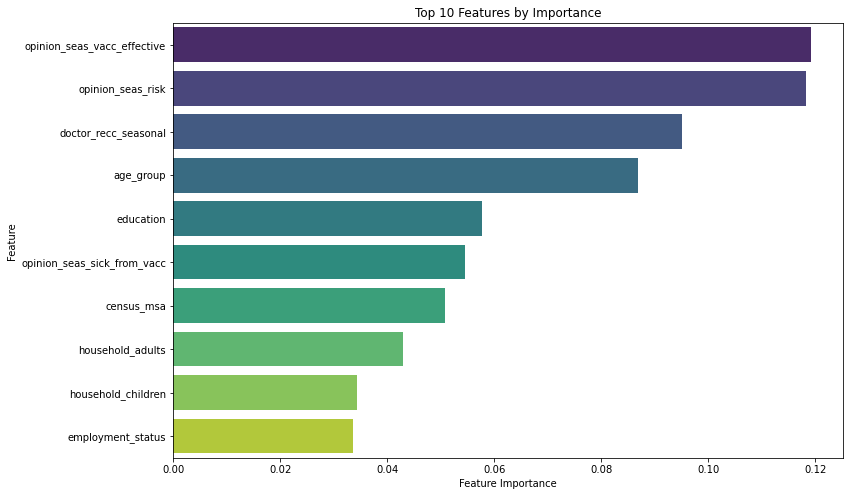

In [1444]:
# Display the top 10 features
top_10_features = feature_importances.head(10)

# Plotting the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')

# Set labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance')

# Show plot
plt.show()

# <font color=green><i>Modeling</i></font> 

### 1.Logical Reggression model


In [1445]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train a Random Forest to get feature importances
X = train_df.drop(columns='seasonal_vaccine')
y = train_df['seasonal_vaccine']

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Step 2: Select the top 10 features
top_10_features = feature_importances.head(10)['Feature']
X_top_10 = X[top_10_features]

# Step 3: Split the data
X_train, X_val, y_train, y_val = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

# Step 4: Create and train the baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
y_pred = baseline_model.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print(f'Baseline Model Accuracy: {accuracy:.2f}')

# Detailed classification report
report = classification_report(y_val, y_pred)
print('Classification Report:')
print(report)


Baseline Model Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      2891
         1.0       0.76      0.73      0.74      2451

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



- The Logistic Regression model shows a balanced performance with a slightly better recall for class 0.0 and slightly higher precision for class 1.0.

- It performs well overall, with an accuracy of 77%, indicating that it is a reliable model for predicting vaccination status.

- Both classes are relatively well-predicted, though there's room for improvement, especially in recall for class 1.0.

### Plotting the presicion and recall for each class

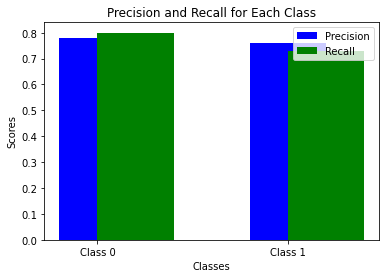

In [1446]:
# Data from your classification report
classes = ['Class 0', 'Class 1']
precision = [0.78, 0.76]
recall = [0.80, 0.73]

# Creating the plot
x = range(len(classes))

plt.bar(x, precision, width=0.4, label='Precision', color='blue', align='center')
plt.bar(x, recall, width=0.4, label='Recall', color='green', align='edge')

# Adding title and labels
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision and Recall for Each Class')
plt.xticks(x, classes)
plt.legend()

# Show plot
plt.show()


- The above graph shows that the model performed fairly well across both classes, with all metrics hovering around 0.75 to 0.80. This indicates a balanced model, although it is slightly better at identifying people who did not receive the vaccine (Class 0) than those who did (Class 1).


### Logical regression Model Evluation

#### 1.Confusion matrix

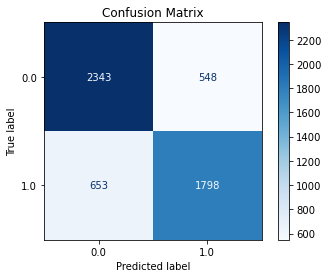

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


- The proportion of correctly predicted samples (both true positives and true negatives) out of all predictions ligns with the accuracy of around 77%.

- There is a noticeable amount of False Positives (543) and False Negatives (653), meaning the model struggles with correctly identifying some of the positive and negative classes.

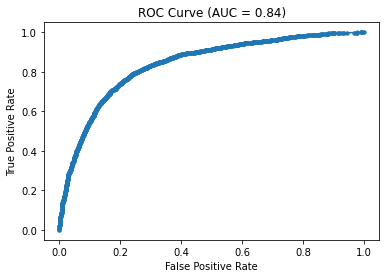

In [1447]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = baseline_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()


The ROC curve and the AUC value indicate that the baseline model performs well in predicting the outcome.

## 2.Desicion Tree Model

In [1448]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 4: Create and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
y_pred_dt = decision_tree_model.predict(X_val)

# Evaluate model performance
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f'Decision Tree Model Accuracy: {accuracy_dt:.2f}')
print(report)


Decision Tree Model Accuracy: 0.68
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      2891
         1.0       0.76      0.73      0.74      2451

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



The desicion tree model shows a lower accuracy of 68% compared to that of the logical regresion whichis 77%

### Decision tree model evaluation

- Confusion Matrix

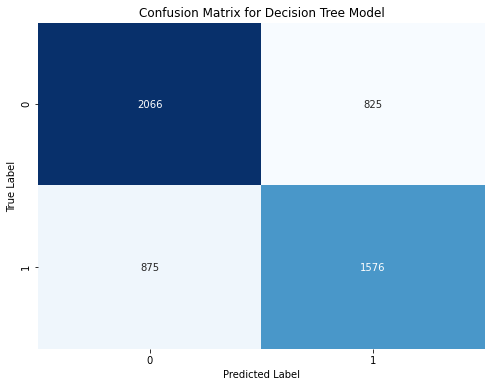

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_dt)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


####  ROC Evaluation

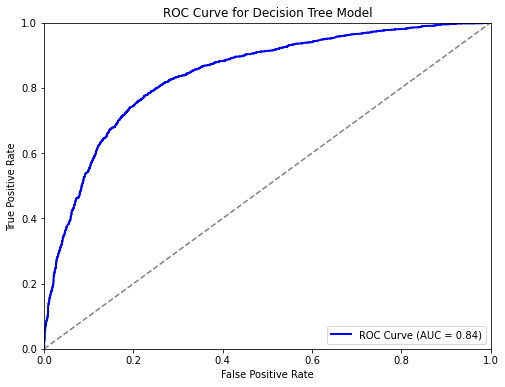

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Step 6: Calculate probabilities
y_prob_dt = baseline_model.predict_proba(X_val)[:, 1]

# Step 7: Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Step 8: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc="lower right")
plt.show()



# <font color=green><i>Conclusions</i></font> 


### 1. Objective: Build a Model to Identify Key Features Influencing Vaccination Status
The analysis successfully identified the top 10 features most critical for predicting seasonal flu vaccination status. The correlation matrix highlights that the two most significant features are related to personal opinions about the vaccine, each with an importance score of approximately 0.11. This underscores that individuals' perceptions of the vaccine's risk and effectiveness are major factors influencing their decision to get vaccinated. These insights are crucial for understanding the key drivers behind vaccination decisions.

### 2. Objective: Minimize False Positives and False Negatives to Enhance Model Reliability
The logical regression model significantly outperforms  decision tree model in minimizing prediction errors. The logical regression model achieved 222 more true negatives (TN) and 277 more true positives (TP) compared desicion tree model. This indicates that logical regression is more effective at accurately identifying both individuals who did and did not receive the vaccine. By reducing false positives and false negatives, GBM enhances the overall reliability of vaccination status predictions.

### 3. Objective: Evaluate and Compare Models to Determine the Highest Accuracy
The logical regression model demonstrates superior performance over decision tree based on accuracy metrics. With and accuracy level of 77% and an ROC AUC score of 86 compared to 68% and 84 of the decsion tree, 



# <font color=green><i>Recommenations</i></font> 

- Careful examination of the significance of identified predictors, such as opinion_seas_risk, will help understand underlying factors and ensure fairness in decision-making

- To ensure improved data collection, it is essential to include a wider range of demographic groups, thereby achieving a more diverse and balanced dataset.

- Regularly review and update the model to ensure it adapts to new data and trends. 
***